In [33]:
import os
import pandas as pd
import numpy as np
import datetime
import tqdm
import json

import matplotlib.pyplot as plt

### Setting Directory

In [34]:

image_dir = 'D:\Dissertation\Preprocessing\helioviewer_images'
# Path to the JSON file
file_path = 'D:\\Dissertation\\Kp data\\kpdata.json'




### Opening Kp and converting to Dataframe
#### Export as CSV

                   datetime     Kp
0 2011-01-01 00:00:00+00:00  1.333
1 2011-01-01 03:00:00+00:00  0.667
2 2011-01-01 06:00:00+00:00  0.000
3 2011-01-01 09:00:00+00:00  0.667
4 2011-01-01 12:00:00+00:00  1.000


C:\Users\mirzi\AppData\Local\Temp\ipykernel_38352\802931089.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['datetime'].dt.to_period('M')


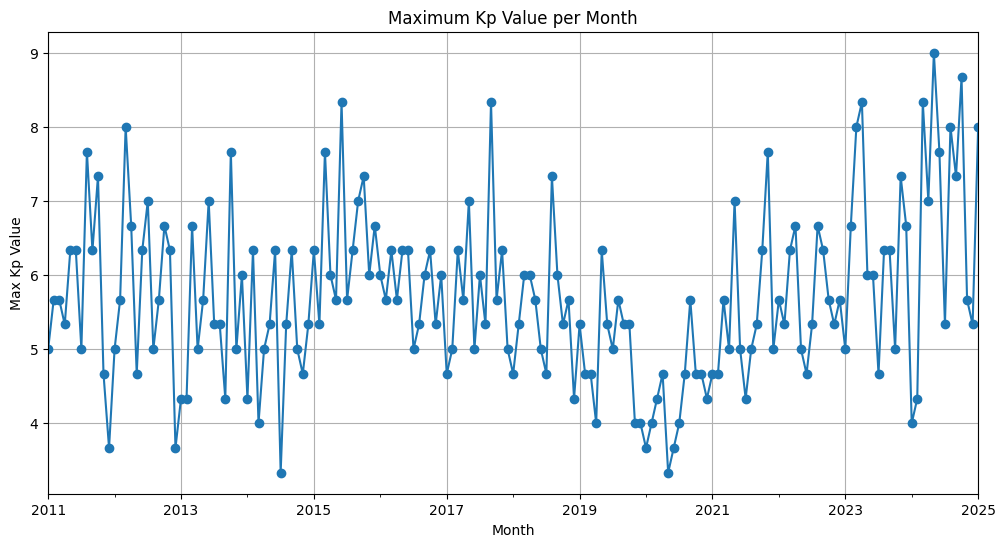

In [35]:
# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert datetime and Kp values to numpy arrays
datetime_array = np.array(data['datetime'])
Kp = np.array(data['Kp'])

df = pd.DataFrame({'datetime': datetime_array, 'Kp': Kp})
df['datetime'] = pd.to_datetime(df['datetime'])  # Convert to datetime format
print(df.head())

df.to_csv('D:\\Dissertation\\Kp data\\kpdata.csv', index=False)
# Resample the dataframe to get the maximum Kp value per month
df['year_month'] = df['datetime'].dt.to_period('M')
max_kp_per_month = df.groupby('year_month')['Kp'].max()

# Plot the line graph
plt.figure(figsize=(12, 6))
max_kp_per_month.plot(kind='line', marker='o')
plt.title('Maximum Kp Value per Month')
plt.xlabel('Month')
plt.ylabel('Max Kp Value')
plt.grid(True)
plt.show()

### Making list of images

In [36]:
# List all files in the image directory
image_files = []
for root, dirs, files in os.walk(image_dir):
    for d in dirs:
        image_directory = os.path.join(root, d)
        image_files += [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith('.jp2')]
        # image_files += [os.path.join(image_directory, f).replace('D:\\Dissertation\\Preprocessing\\', '/content/') for f in os.listdir(image_directory) if f.endswith('.jp2')]
        # image_files = [f.replace('\\', '/') for f in image_files]
print(f'Found {len(image_files)} Image files')
print(image_files[:5])

Found 122736 Image files
['D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_000000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_010000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_020000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_030000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_040000.jp2']


### Grouping images by 10

In [37]:
count = 0
group = []
for i in range(0, len(image_files), 10):
    group += [image_files[i:i+10]]
print(len(group))
print(len(group[0]))
print(len(group[-1]))
print(group[:5])
group = group[0: -1]
print(len(group))
print(len(group[0]))
print(len(group[-1]))
print(group[:5])

12274
10
6
[['D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_000000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_010000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_020000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_030000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_040000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_050000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_060000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_070000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_080000.jp2', 'D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_090000.jp2'], ['D:\\Dissertation\\Preprocessing\\helioviewer_images\\2011\\AIA_193_20110101_100000.j

In [38]:
list_of_dates = []
for i in group:
    last_image = i[-1].split('\\')[-1]
    year = last_image[8:12]
    month = last_image[12:14]
    day = last_image[14:16]
    hour = last_image[17:19]
    date = datetime.datetime(int(year), int(month), int(day), int(hour))
    list_of_dates.append(date)
print(len(list_of_dates))
for date in list_of_dates:
    print(date)

12273
2011-01-01 09:00:00
2011-01-01 19:00:00
2011-01-02 05:00:00
2011-01-02 15:00:00
2011-01-03 01:00:00
2011-01-03 11:00:00
2011-01-03 21:00:00
2011-01-04 07:00:00
2011-01-04 17:00:00
2011-01-05 03:00:00
2011-01-05 13:00:00
2011-01-05 23:00:00
2011-01-06 09:00:00
2011-01-06 19:00:00
2011-01-07 05:00:00
2011-01-07 15:00:00
2011-01-08 01:00:00
2011-01-08 11:00:00
2011-01-08 21:00:00
2011-01-09 07:00:00
2011-01-09 17:00:00
2011-01-10 03:00:00
2011-01-10 13:00:00
2011-01-10 23:00:00
2011-01-11 09:00:00
2011-01-11 19:00:00
2011-01-12 05:00:00
2011-01-12 15:00:00
2011-01-13 01:00:00
2011-01-13 11:00:00
2011-01-13 21:00:00
2011-01-14 07:00:00
2011-01-14 17:00:00
2011-01-15 03:00:00
2011-01-15 13:00:00
2011-01-15 23:00:00
2011-01-16 09:00:00
2011-01-16 19:00:00
2011-01-17 05:00:00
2011-01-17 15:00:00
2011-01-18 01:00:00
2011-01-18 11:00:00
2011-01-18 21:00:00
2011-01-19 07:00:00
2011-01-19 17:00:00
2011-01-20 03:00:00
2011-01-20 13:00:00
2011-01-20 23:00:00
2011-01-21 09:00:00
2011-01-21 19:

In [39]:
matched_kp = []
matched_kp_index = []
# Convert datetime column to datetime type if it's not already and remove timezone information
df['datetime'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)
for i in range(len(list_of_dates)):
    date = list_of_dates[i]
    date = date + datetime.timedelta(days=2)
    match = df[df['datetime'] >= date][0:1]
    if match.empty:
        print(f'No match found for {date}')
    matched_kp += match['datetime'].tolist()
    matched_kp_index += match.index.tolist()
    
print(len(matched_kp))
print(len(matched_kp_index))
print(matched_kp[:5])
print(list_of_dates[:5])

12273
12273
[Timestamp('2011-01-03 09:00:00'), Timestamp('2011-01-03 21:00:00'), Timestamp('2011-01-04 06:00:00'), Timestamp('2011-01-04 15:00:00'), Timestamp('2011-01-05 03:00:00')]
[datetime.datetime(2011, 1, 1, 9, 0), datetime.datetime(2011, 1, 1, 19, 0), datetime.datetime(2011, 1, 2, 5, 0), datetime.datetime(2011, 1, 2, 15, 0), datetime.datetime(2011, 1, 3, 1, 0)]


In [40]:
max_Kp_values = []
for index in matched_kp_index:
    kp_values = Kp[index: index + 9]
    max_Kp = max(kp_values)
    max_Kp_values.append(max_Kp)
print(len(max_Kp_values))  


12273


count    12273.000000
mean         2.870444
std          1.339473
min          0.000000
25%          2.000000
50%          2.667000
75%          3.667000
max          9.000000
Name: Kp, dtype: float64


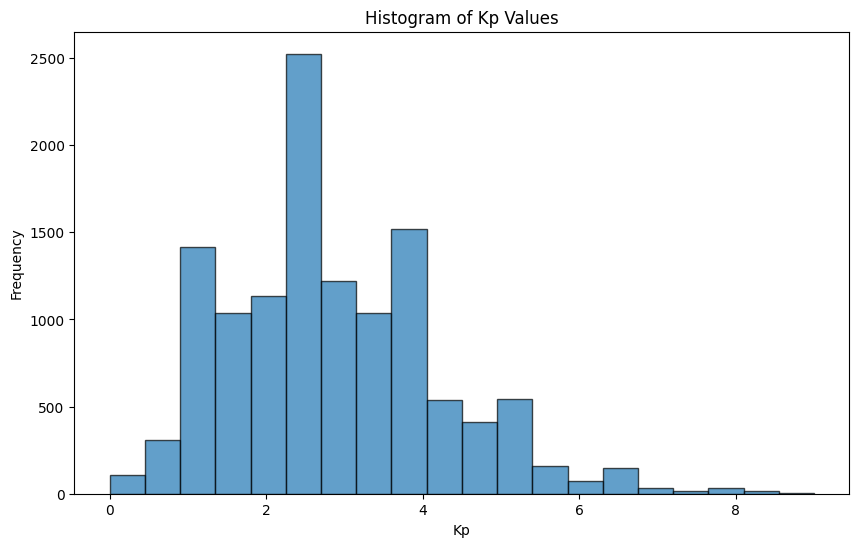

In [41]:
# Convert group to a DataFrame and export as CSV
group_df = pd.DataFrame({'Images': group, 'Kp': max_Kp_values})
group_df.to_csv('D:\\New folder (2)\\dataset.csv', index=False)

# Calculate statistics of Kp values
kp_stats = group_df['Kp'].describe()
print(kp_stats)


# Histogram of Kp values
plt.figure(figsize=(10, 6))
plt.hist(group_df['Kp'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Kp Values')
plt.xlabel('Kp')
plt.ylabel('Frequency')
plt.show()




count    2046.000000
mean        2.844411
std         1.306722
min         0.000000
25%         2.000000
50%         2.667000
75%         3.667000
max         8.333000
Name: Kp, dtype: float64


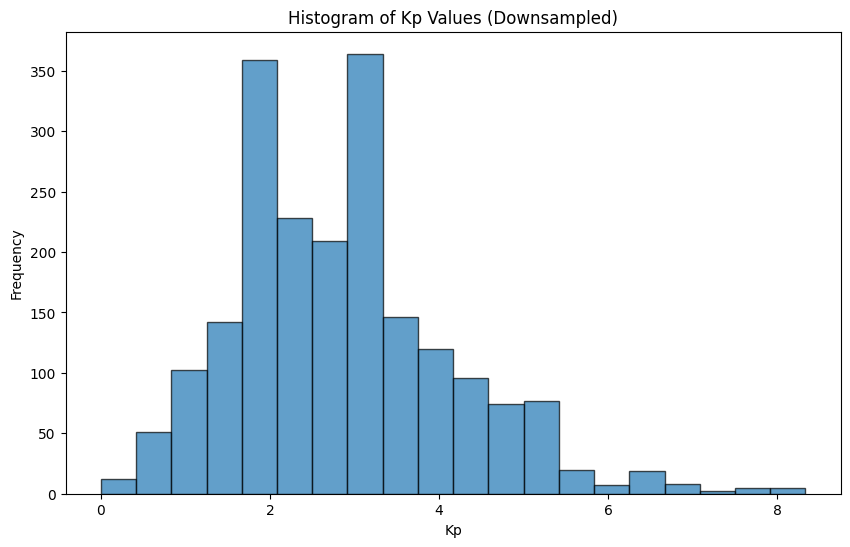

In [42]:
group_df = group_df[::6]
group_df.to_csv('D:\\New folder (2)\\dataset.csv', index=False)

# Calculate statistics of Kp values for the downsampled group_df
kp_stats_downsampled = group_df['Kp'].describe()
print(kp_stats_downsampled)

# Histogram of Kp values
plt.figure(figsize=(10, 6))
plt.hist(group_df['Kp'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Kp Values (Downsampled)')
plt.xlabel('Kp')
plt.ylabel('Frequency')
plt.show()


In [43]:
# Count the number of Kp values greater than 5
count_greater_than_5 = group_df[group_df['Kp'] > 5].shape[0]

# Count the number of Kp values less than 5
count_less_than_5 = group_df[group_df['Kp'] < 5].shape[0]

print(f'Number of Kp values greater than 5: {count_greater_than_5}')
print(f'Number of Kp values less than 5: {count_less_than_5}')

Number of Kp values greater than 5: 106
Number of Kp values less than 5: 1903


In [44]:
# from sklearn.utils import resample

# # Separate the data into two groups
# group_df_high_kp = group_df[group_df['Kp'] > 5]
# group_df_low_kp = group_df[group_df['Kp'] <= 5]

# # Oversample the high Kp group to match the size of the low Kp group
# group_df_high_kp_oversampled = resample(group_df_high_kp, 
#                                         replace=True,  # Sample with replacement

#                                         n_samples=len(group_df_low_kp),
#                                         random_state=42)
# # Sort the oversampled data by the original index
# group_df_high_kp_oversampled = group_df_high_kp_oversampled.sort_index()

# # Initialize an empty DataFrame to store the balanced data
# group_df_balanced = pd.DataFrame()

# # Iterate through the original DataFrame
# for index, row in group_df.iterrows():
#     # Append the original row to the balanced DataFrame
#     group_df_balanced = pd.concat([group_df_balanced, pd.DataFrame([row])], ignore_index=False)
    
#     # If the current row has a Kp value greater than 5, append an oversampled row immediately after it
#     if row['Kp'] > 5:
#         oversampled_row = group_df_high_kp_oversampled.loc[[index]]
#         group_df_balanced = pd.concat([group_df_balanced, oversampled_row], ignore_index=False)

# # Reset the index of the balanced DataFrame
# group_df_balanced = group_df_balanced.reset_index(drop=True)


# # Combine the oversampled high Kp group with the low Kp group
# group_df_balanced = pd.concat([group_df_low_kp, group_df_high_kp_oversampled])

# print(group_df_balanced['Kp'].value_counts())

# for index, row in group_df_balanced.iterrows():
#     print(f"Index: {index}, Kp: {row['Kp']}, Images: {row['Images']}")
    
# group_df_balanced.to_csv('D:\\New folder (2)\\dataset.csv', index=False)

# # Calculate statistics of Kp values for the downsampled group_df
# kp_stats_downsampled = group_df_balanced['Kp'].describe()
# print(kp_stats_downsampled)

# # Histogram of Kp values
# plt.figure(figsize=(10, 6))
# plt.hist(group_df_balanced['Kp'], bins=20, edgecolor='k', alpha=0.7)
# plt.title('Histogram of Kp Values (Downsampled)')
# plt.xlabel('Kp')
# plt.ylabel('Frequency')
# plt.show()